<h1><center>MNIST classification using Keras<center></h1>

# Importing Keras

In [28]:
import numpy as np
from matplotlib import pyplot as plt
# Importing the Keras main module forcing tensorflow 1.x backend
import tensorflow as tf
import keras
print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 2.1.0
Using keras version 2.3.1


## Loading and preparing the MNIST dataset

Load the MNIST dataset via keras.datasets. Again, turn train and test labels into one-hot encoding, and reshape and normalize data as in the first exercise. 

In [29]:
#@title
# The MNSIT dataset is ready to be imported from Keras into RAM
# Warning: you cannot do that for larger databases (e.g., ImageNet)
from keras.datasets import mnist
# START CODE HERE

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# END CODE HERE

In [30]:
from keras.utils.np_utils import to_categorical
# START CODE HERE

y_train_oneHOT = to_categorical(y_train)
y_test_oneHOT = to_categorical(y_test)

# END CODE HERE

In [31]:
def normalize(input_):
    x = input_.copy()
    x = np.array(x)
    for i in range(len(x)):
        x[i] = (x[i] - np.mean(x[i]))/x[i].std()
    return x

In [32]:
# Reshape to proper images with 1 color channel according to backend scheme
train_images = x_train.copy()
test_images = x_test.copy()

img_rows_train, img_cols_train = train_images.shape[1], train_images.shape[2]
img_rows_test, img_cols_test = test_images.shape[1], test_images.shape[2]

train_images = train_images.reshape(len(x_train), 784)
test_images = test_images.reshape(len(x_test), 784)
# START CODE HERE
print(train_images.shape)
# END CODE HERE

# Cast pixels from uint8 to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Now let us normalize the images so that they have zero mean and standard deviation
# Hint: are real testing data statistics known at training time ?
# START CODE HERE

imgs_norm_train = normalize(train_images)
imgs_norm_test = normalize(test_images)

# END CODE HERE

(60000, 784)


## Defining the neural network architecture (i.e., the network model)

Look at this [cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras_Cheat_Sheet_Python.pdf) for some basic information on how to use numpy.

First, try to replicate the classifier of the first exercise. Secondly, create a fully connected network.
For the fully connected layer, you can for example use this architecture: 
$$ (784) \rightarrow (300) \rightarrow (10) $$
For this first implementation of the network, use only sigmoid activations in the hidden layer. Remember to use the right output activation function ! 

In [33]:
# The Sequential module is a container for more complex NN elements and
# defines a loop-less NN architecture
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras import regularizers

# START CODE HERE
input_shape = imgs_norm_train[0].shape
output_shape = y_train_oneHOT[0].shape

In [34]:
# --- For the replication of Ex1 --- 
modelEx1 = Sequential()
modelEx1.add(Dense(10, input_shape = input_shape, 
                   kernel_regularizer=regularizers.l2(0.0001), activation='softmax'))
# - - - - - - - - - - - - - - - - - -

In [35]:
model = Sequential()
model.add(Dense(300, input_shape = input_shape, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
# END CODE HERE

Instantiate a SGD optimizer with a tentative learning rate of $\\eta = 10^{-2}$ and, using the appropriate loss function (which is called, in keras, ```'categorical_crossentropy'```) and compile the model.

In [36]:
# The optimizers module provides a number of optimization algorithms for updating
# a netwok parameters accoridng to the computed error gradints
from keras import optimizers as op

In [37]:
# --- For the replication of Ex1 --- 
sgdEx1 = op.SGD(lr=0.01)
modelEx1.compile(loss='mean_absolute_error', optimizer=sgdEx1, metrics=['accuracy'])
modelEx1.summary()
# - - - - - - - - - - - - - - - - - -

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [38]:
# START CODE HERE
sgd = op.SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
# END CODE HERE

# We can now have a look at the defined model topology
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_28 (Dense)             (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


## Training the network

Train the model for 10 epochs using the ```.fit()``` method, validating the model at each epoch and keeping track of the training history for later plotting. Make sure you enable ```.fit()``` verbose mode in order to visualize the training.

In order to accelerate training, use the ```batch_size``` option of ```.fit()```, which will process a batch of examples at the same time, and make one update for all of them, averaged over the gradients for each training example of the batch. You can begin with a small size, and experiment with a larger size later.

In [39]:
# --- For the replication of Ex1 --- 
epochsEx1 = 1
histEx1 = modelEx1.fit(imgs_norm_train, y_train_oneHOT, batch_size=1, 
          epochs=epochsEx1, verbose=True, validation_data=(imgs_norm_test, y_test_oneHOT))
# - - - - - - - - - - - - - - - - - -

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0585 - accuracy: 0.7398 - val_loss: 0.0521 - val_accuracy: 0.7645


In [40]:
# This is where the actual training-testing happens
# Number of epochs we want to train
epochs = 10

# START CODE HERE
hist = model.fit(imgs_norm_train, y_train_oneHOT, 
                 batch_size=100, epochs=epochs, verbose=True,
                validation_data=(imgs_norm_test, y_test_oneHOT))
# END CODE HERE

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 48us/step - loss: 1.0857 - accuracy: 0.7595 - val_loss: 0.6311 - val_accuracy: 0.8632
Epoch 2/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.5535 - accuracy: 0.8687 - val_loss: 0.4645 - val_accuracy: 0.8840
Epoch 3/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.4496 - accuracy: 0.8841 - val_loss: 0.4013 - val_accuracy: 0.8959
Epoch 4/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.4006 - accuracy: 0.8934 - val_loss: 0.3645 - val_accuracy: 0.9039
Epoch 5/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.3706 - accuracy: 0.8993 - val_loss: 0.3414 - val_accuracy: 0.9090
Epoch 6/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.3497 - accuracy: 0.9031 - val_loss: 0.3240 - val_accuracy: 0.9121
Epoch 7/10
60000/60000 [==============================] - 3s 46us/st

In [41]:
score = model.evaluate(imgs_norm_test, y_test_oneHOT, verbose=False)
scoreEx1 = modelEx1.evaluate(imgs_norm_test, y_test_oneHOT, verbose=False)

print('--- Results for the Neural Network with 3 layers ---')
print('Final Loss for Test Set', score[0])
print('Final Loss for Test Set', score[1])

print('\n--- Results for the Neural Network from Ex1 replication ---')
print('Final Loss for Test Set', scoreEx1[0])
print('Final Loss for Test Set', scoreEx1[1])

--- Results for the Neural Network with 3 layers ---
Final Loss for Test Set 0.2837523245751858
Final Loss for Test Set 0.9197999835014343

--- Results for the Neural Network from Ex1 replication ---
Final Loss for Test Set 0.052055215936899185
Final Loss for Test Set 0.7645000219345093


## Visualizing the network performance

Visualize the training history using the ```pyplot``` package:
- In one graph, plot the train and vaidation loss functions,
- In another graph, the train and validation accuracy.
By comparing the training the testing curves, what can we conclude about the quality of the training ?

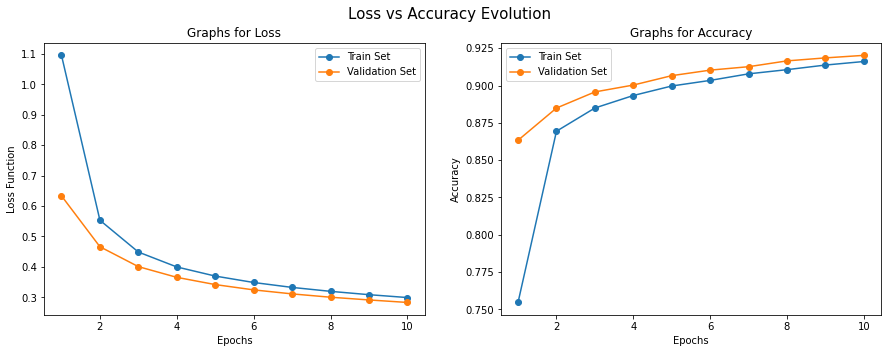

In [15]:
# We now want to plot the train and validation loss functions and accuracy curves
losses = hist.history['loss']
val_loss = hist.history['val_loss']

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

# START CODE HERE
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(np.linspace(1, 10, 10),losses,'-o', label='Train Set')
plt.plot(np.linspace(1, 10, 10),val_loss,'-o', label='Validation Set')
plt.ylabel('Loss Function')
plt.xlabel('Epochs')
plt.title('Graphs for Loss')
plt.legend()
# END CODE HERE

# summarize history for accuracy
# START CODE HERE
plt.subplot(1,2,2)
plt.plot(np.linspace(1, 10, 10), acc, '-o', label='Train Set')
plt.plot(np.linspace(1, 10, 10), val_acc, '-o', label='Validation Set')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Graphs for Accuracy')
plt.legend()

plt.suptitle('Loss vs Accuracy Evolution', size=15)
# END CODE HERE
plt.show()

## Comment:
**We can see that, in fact, we have achieved a very well trained model.**

**The validation set already starts in a much better position and, with each interaction, converges even more towards the same accuracy and loss function value.**

**Also, for the replication of Ex1 using now Keras, we reached a value very close to the accuracy found in the previous exercise.**

## Experiments

Note down the performance of the larger network in terms of training and validation accuracy as a reference (save the loss/accuracy graphs of the network).

Then, experiment as follow and compare performance with the reference scenario:

*  Experiment increasing the size of the batch and compare the performance with reference.
*  Experiment replacing the sigmoid activations with Relus and note what happens.
*  Experiment with a larger architecture, for example: 
$$ (784) \rightarrow (300) \rightarrow (128) \rightarrow (84) \rightarrow (10) $$

### Experiment 1

In [16]:
### Creating the Model for Experiment 1 ###
###########################################
# Chosing epoch
epochsEx1 = 10

# Different batches
bs = [10, 50, 100, 500, 1000, 5000]

losses_EXP1 = []
val_losses_EXP1 = []

accs_EXP1 = []
val_accs_EXP1 = []

scoresEXP1 = []

# Training
for i in range(len(bs)):
    modelEXP1 = Sequential()
    modelEXP1.add(Dense(300, input_shape = input_shape, activation='sigmoid'))
    modelEXP1.add(Dense(10, activation='softmax'))

    # Compiling
    sgdEXP1 = op.SGD(lr=0.01)
    modelEXP1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

    # Summaring
    modelEXP1.summary()

    histEXP1 = modelEXP1.fit(imgs_norm_train, y_train_oneHOT, batch_size=bs[i], 
                             epochs=epochsEx1, verbose=True,
                            validation_data=(imgs_norm_test, y_test_oneHOT))
    
    losses_EXP1.append(histEXP1.history['loss'])
    val_losses_EXP1.append(histEXP1.history['val_loss'])
    
    accs_EXP1.append(histEXP1.history['accuracy'])
    val_accs_EXP1.append(histEXP1.history['val_accuracy'])
    
    sc_exp1 = modelEXP1.evaluate(imgs_norm_test, y_test_oneHOT, verbose=False)
    scoresEXP1.append(sc_exp1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.4539 - accuracy: 0.8799 - val_loss: 0.2836 - val_accuracy: 0.9197
Epoch 2/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.2686 - accuracy: 0.9236 - val_loss: 0.2345 - val_accuracy: 0.9355
Epoch 3/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.2230 - accuracy: 0.9369 - val_loss: 0.2011 - val_accuracy: 0.9425
Epoch 4/10
60

60000/60000 [==============================] - 1s 17us/step - loss: 0.5501 - accuracy: 0.8675 - val_loss: 0.5152 - val_accuracy: 0.8823
Epoch 9/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.5220 - accuracy: 0.8724 - val_loss: 0.4902 - val_accuracy: 0.8850
Epoch 10/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.4992 - accuracy: 0.8759 - val_loss: 0.4695 - val_accuracy: 0.8875
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [=====

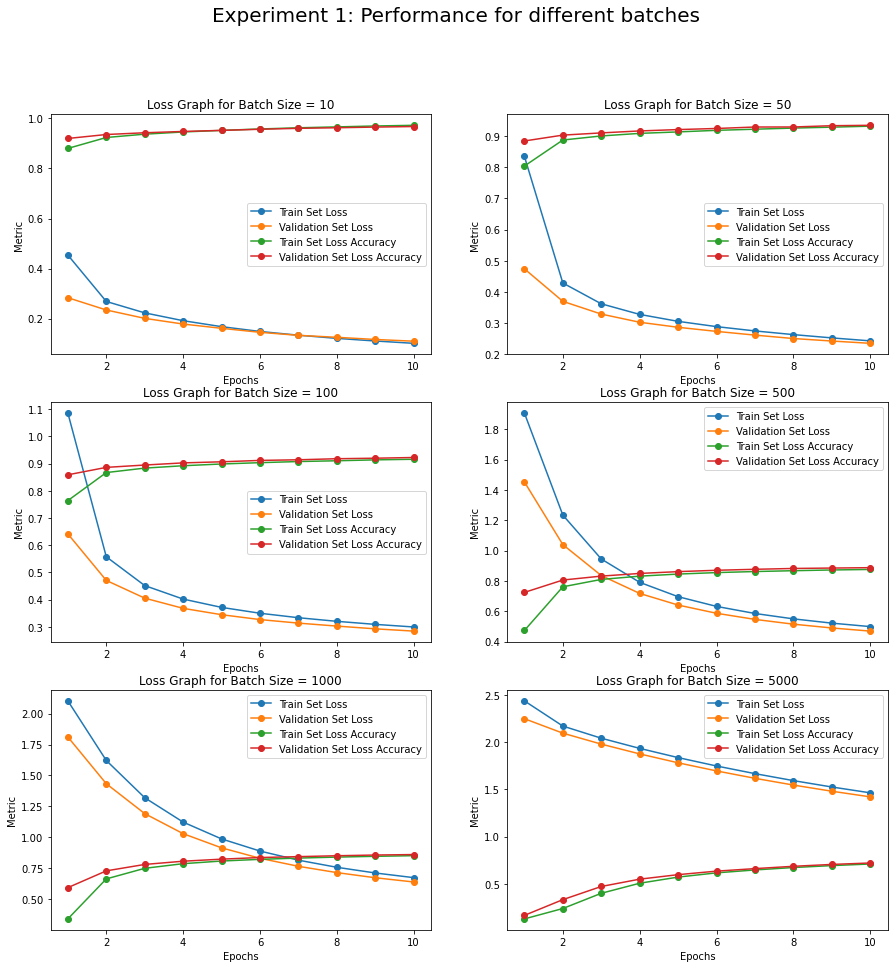

In [17]:
plt.figure(figsize=(15,15))

for i in range(len(bs)):
    plt.subplot(3,2,i+1)
    plt.plot(np.linspace(1, epochsEx1, epochsEx1), losses_EXP1[i],'-o', label='Train Set Loss')
    plt.plot(np.linspace(1, epochsEx1, epochsEx1), val_losses_EXP1[i],'-o', label='Validation Set Loss')
    plt.plot(np.linspace(1, epochsEx1, epochsEx1), accs_EXP1[i],'-o', label='Train Set Loss Accuracy')
    plt.plot(np.linspace(1, epochsEx1, epochsEx1), val_accs_EXP1[i],'-o', label='Validation Set Loss Accuracy')
    plt.ylabel('Metric')
    plt.xlabel('Epochs')
    plt.title('Loss Graph for Batch Size = '+str(bs[i]))
    plt.legend()

plt.suptitle('Experiment 1: Performance for different batches', size=20)
plt.show()

In [18]:
for i in range(len(bs)):
    print('\n --- For Batch Size = '+str(bs[i])+' ---')
    print('Final Loss: ', scoresEXP1[i][0])
    print('Final Accuracy: ', scoresEXP1[i][1])


 --- For Batch Size = 10 ---
Final Loss:  0.10986972720399499
Final Accuracy:  0.9674000144004822

 --- For Batch Size = 50 ---
Final Loss:  0.23482506509125234
Final Accuracy:  0.9345999956130981

 --- For Batch Size = 100 ---
Final Loss:  0.2841508855700493
Final Accuracy:  0.9222999811172485

 --- For Batch Size = 500 ---
Final Loss:  0.46948849692344663
Final Accuracy:  0.887499988079071

 --- For Batch Size = 1000 ---
Final Loss:  0.6377583657264709
Final Accuracy:  0.8597000241279602

 --- For Batch Size = 5000 ---
Final Loss:  1.4218606410980226
Final Accuracy:  0.7206000089645386


## Comment:

**The batch size defines the number of samples that will be propagated through the network.**

**That means when we choose the batch value, we are defining how many in how many samples our network will be trained. Therefore, the smaller our batch, the better trained and more accurate our model will be, as we can see from the values printed above.**

### Experiment 2

In [19]:
### Creating the Model for Experiment 2 ###
###########################################
modelEXP2 = Sequential()
modelEXP2.add(Dense(300, input_shape = input_shape, activation='relu'))
modelEXP2.add(Dense(10, activation='softmax'))

# Compiling
sgdEXP2 = op.SGD(lr=0.01)
modelEXP2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Summaring
modelEXP2.summary()

# Chosing epoch
epochsEx2 = 10

# Training
histEXP2 = modelEXP2.fit(imgs_norm_train, y_train_oneHOT, batch_size=50, 
                         epochs=epochsEx2, verbose=True,
                         validation_data=(imgs_norm_test, y_test_oneHOT))
    
losses_EXP2 = histEXP2.history['loss']
val_losses_EXP2 = histEXP2.history['val_loss']

accs_EXP2 = histEXP2.history['accuracy']
val_accs_EXP2 = histEXP2.history['val_accuracy']
    
sc_exp2 = modelEXP2.evaluate(imgs_norm_test, y_test_oneHOT, verbose=False)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.3911 - accuracy: 0.8881 - val_loss: 0.2278 - val_accuracy: 0.9342
Epoch 2/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.2091 - accuracy: 0.9401 - val_loss: 0.1792 - val_accuracy: 0.9476
Epoch 3/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.1662 - accuracy: 0.9529 - val_loss: 0.1533 - val_accuracy: 0.9550
Epoch 4/10
60000

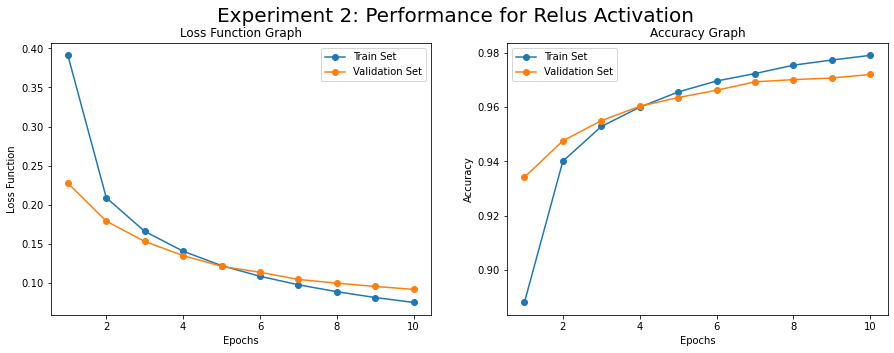

In [20]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(np.linspace(1, epochsEx2, epochsEx2), losses_EXP2,'-o', label='Train Set')
plt.plot(np.linspace(1, epochsEx2, epochsEx2), val_losses_EXP2,'-o', label='Validation Set')
plt.ylabel('Loss Function')
plt.xlabel('Epochs')
plt.title('Loss Function Graph')
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.linspace(1, epochsEx2, epochsEx2), accs_EXP2,'-o', label='Train Set')
plt.plot(np.linspace(1, epochsEx2, epochsEx2), val_accs_EXP2,'-o', label='Validation Set')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy Graph')
plt.legend()

plt.suptitle('Experiment 2: Performance for Relus Activation', size=20)
plt.show()

In [21]:
print('--- For Relus Activation ---')
print('Final Loss: ', sc_exp2[0])
print('Final Accuracy: ', sc_exp2[1])

--- For Relus Activation ---
Final Loss:  0.09208589251451195
Final Accuracy:  0.972000002861023


## Comment:

**'relu' is one of the options of activation function and stands for Rectified Linear Unit, and is a type of activation function. Mathematically, it is defined as $y = max(0, x)$.**

**The 'relu' is widely used in neural networks as activation function and it is usually the best first choice if we are in doubt about which one to choose.**

**We can easily check this above, because the choice of 'relu' made our model achieve better accuracy than all the cases in the previous experiment.**

### Experiment 3

In [22]:
### Creating the Model for Experiment 3 ###
###########################################
modelEXP3 = Sequential()
modelEXP3.add(Dense(300, input_shape = input_shape))
modelEXP3.add(Dense(128, activation='sigmoid'))
modelEXP3.add(Dense(84, activation='sigmoid'))
modelEXP3.add(Dense(10, activation='softmax'))

# Compiling
sgdEXP3 = op.SGD(lr=0.01)
modelEXP3.compile(loss='categorical_crossentropy', optimizer=sgdEXP3, metrics=['accuracy'])

# Summaring
modelEXP3.summary()

# Chosing epoch
epochsEx3 = 10

# Training
histEXP3 = modelEXP3.fit(imgs_norm_train, y_train_oneHOT, batch_size=50, epochs=10, verbose=True,
                  validation_data=(imgs_norm_test, y_test_oneHOT))
    
losses_EXP3 = histEXP3.history['loss']
val_losses_EXP3 = histEXP3.history['val_loss']

accs_EXP3 = histEXP3.history['accuracy']
val_accs_EXP3 = histEXP3.history['val_accuracy']

sc_exp3 = modelEXP3.evaluate(imgs_norm_test, y_test_oneHOT, verbose=False)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_19 (Dense)             (None, 128)               38528     
_________________________________________________________________
dense_20 (Dense)             (None, 84)                10836     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                850       
Total params: 285,714
Trainable params: 285,714
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 77us/step - loss: 1.6293 - accuracy: 0.6635 - val_loss: 1.0454 - val_accuracy: 0.8169
Epoch 2/10
60000/60000 [========================

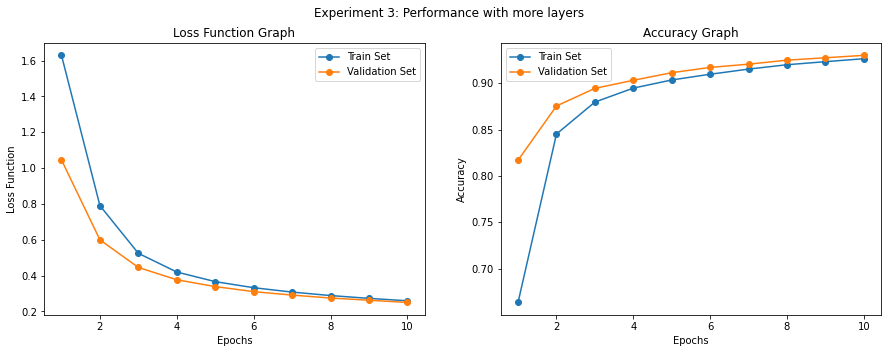

In [23]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(np.linspace(1, epochsEx3, epochsEx3), losses_EXP3,'-o', label='Train Set')
plt.plot(np.linspace(1, epochsEx3, epochsEx3), val_losses_EXP3,'-o' , label='Validation Set')
plt.ylabel('Loss Function')
plt.xlabel('Epochs')
plt.title('Loss Function Graph')
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.linspace(1, epochsEx3, epochsEx3), accs_EXP3,'-o', label='Train Set')
plt.plot(np.linspace(1, epochsEx3, epochsEx3), val_accs_EXP3,'-o', label='Validation Set')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy Graph')
plt.legend()

plt.suptitle('Experiment 3: Performance with more layers')
plt.show()

In [24]:
print('--- For Relus Activation ---')
print('Final Loss: ', sc_exp3[0])
print('Final Accuracy: ', sc_exp3[1])

--- For Relus Activation ---
Final Loss:  0.24957756360173225
Final Accuracy:  0.9300000071525574


## Comment:
**I was particularly expecting an even better performance for the network with an extra layer, however, even so, changing the activation function to 'relu' was the most effective change of all experiments.**

## Putting all together !

In [25]:
### Creating the Model for Experiment 3 ###
###########################################
model_last = Sequential()
model_last.add(Dense(300, input_shape = input_shape))
model_last.add(Dense(128, activation='relu'))
model_last.add(Dense(84, activation='relu'))
model_last.add(Dense(10, activation='softmax'))

# Compiling
sgd_last = op.SGD(lr=0.01)
model_last.compile(loss='categorical_crossentropy', optimizer=sgd_last, metrics=['accuracy'])

# Summaring
model_last.summary()

# Chosing epoch
epochs_last = 10

# Training
hist_last = model_last.fit(imgs_norm_train, y_train_oneHOT, batch_size=10, epochs=epochs_last, verbose=True,
                  validation_data=(imgs_norm_test, y_test_oneHOT))
    
losses_last = hist_last.history['loss']
val_losses_last = hist_last.history['val_loss']

accs_last = hist_last.history['accuracy']
val_accs_last = hist_last.history['val_accuracy']

sc_last = model_last.evaluate(imgs_norm_test, y_test_oneHOT, verbose=False)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               38528     
_________________________________________________________________
dense_24 (Dense)             (None, 84)                10836     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                850       
Total params: 285,714
Trainable params: 285,714
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 366us/step - loss: 0.2190 - accuracy: 0.9337 - val_loss: 0.1169 - val_accuracy: 0.9645
Epoch 2/10
60000/60000 [======================

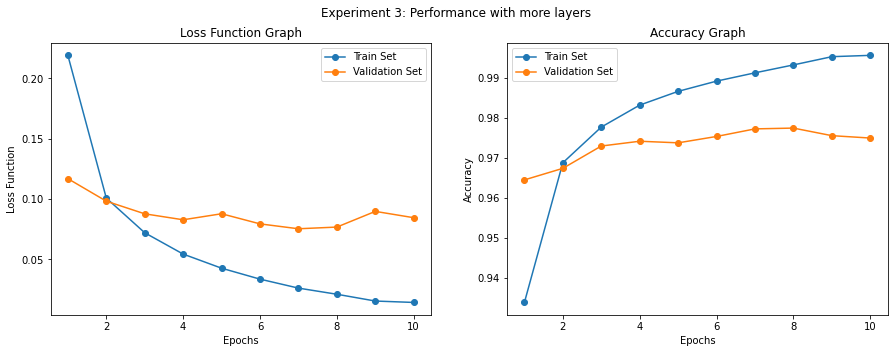

In [26]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(np.linspace(1, epochs_last, epochs_last), losses_last,'-o', label='Train Set')
plt.plot(np.linspace(1, epochs_last, epochs_last), val_losses_last,'-o' , label='Validation Set')
plt.ylabel('Loss Function')
plt.xlabel('Epochs')
plt.title('Loss Function Graph')
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.linspace(1, epochs_last, epochs_last), accs_last,'-o', label='Train Set')
plt.plot(np.linspace(1, epochs_last, epochs_last), val_accs_last,'-o', label='Validation Set')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy Graph')
plt.legend()

plt.suptitle('Experiment 3: Performance with more layers')
plt.show()

In [27]:
print('--- For Relus Activation ---')
print('Final Loss: ', sc_last[0])
print('Final Accuracy: ', sc_last[1])

--- For Relus Activation ---
Final Loss:  0.08450515794371895
Final Accuracy:  0.9750000238418579


## Comment: 

**The precision value for training the model was very high, but we can see that the accuracy of the test set did not follow the same value. The value reached is approximately the same as in experiment 2.**